 # 3ο  Θέμα 
 #### Αλεξανδρόπουλος Σταμάτης     Α.Μ : 03117060
 #### Στάης Άγγελος                Α.Μ : 03117435

Στην άσκηση αυτή  υλοποιήθηκαν  διάφοροι  αλγόριθμοι μηχανικής μάθησης για την αναγνώριση ψηφίων από εικόνα στο dataset MNIST. Συγκεκριμένα, δόθηκαν δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα pixels της κάθε εικόνας και $y_i$ είναι η ετικέτα της εικόνας - ένας ακέραιος στο $[0,9]$. Σε κάθε περίπτωση σχεδιάσαμε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,9]}$$

### 1ο Μέρος 
Στο μέρος αυτό υλοποιήσαμε  συναρτήσεις για την αξιολόγηση ταξινομητών που κατασκευάσαμε σε επόμενα μέρη. Συγκεκριμένα δόθηκε η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές στη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong) και υπολογίζει και τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή. 
Εμείς υλοποιήσαμε στη  μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένα}$$
με τρείς τρόπους που είναι σχεδόν ίδιοι μεταξύ τους. Προφανώς και οι 3 τρόποι βγάζουν το ίδιο αποτέλεσμα.

- **1ος τρόπος** : Αρχικά υπολογίσαμε το accuracy μετρώντας το πλήθος σωστών προβλέψεων απο τις δύο λίστες y_true και y_pred, δηλαδή το πλήθος τον στοιχείων για τα οποία ισχύει (y_true[i]==y_pred[i]) και διαιρέσαμε το πλήθος αυτό με τον σύνολο των δεδομένων, δηλαδή το μήκος της λίστας y_true

- **2ος τρόπος** : Το ίδιο αποτέλεσμα προκύπτει αξιοποιώντας και τον πίνακα  confusion_matrix αφού το πλήθος των σωστών προβλέψεων έιναι ουσιαστικά το ίχνος του πίνακα και το πλήθος των δεδομένων είναι τον σύνολο των στοιχείων του πίνακα. Άρα προκύπτει το ζητούμενο.

- **3ος τρόπος** : Χρησιμοποιώντας την έτοιμη συνάρτηση accuracy_score της βιβλιοθήκης sklearn.metrics, προκύπτει το ίδιο αποτέλεσμα με τους παραπάνω δύο τρόπους. Ο τρόπος αυτός χρησιμοποιήθηκε **μονο** για έλεγχο των αποτελεσμάτων. 

In [1]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self,y_true,y_pred,x):
      self.y_true = y_true
      self.y_pred = y_pred
      self.x = x

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      # accuracy=(TP+TN)/Total where 

      #1ος τρόπος, χρησιμοποιώντας τον ορισμό

      denom=len(y_true)
      nom=0
      for i in range(denom): 
        if y_true[i]==y_pred[i]:
           nom += 1
      
      acc=nom/denom

      
      #2ος τρόπος, χρησιμοποιώντας τον  confusion_matrix


      # conf_m=confusion_matrix(y_true, y_pred)
      # trace=np.trace(conf_m)
      # sum=np.sum(conf_m)
      # acc=trace/sum


      #3ος τρόπος, χρησιμοποιώντας έτοιμη συνάρτηση accuracy_score της βιβλιοθήκης sklearn.metrics
      # acc=sklearn.metrics.accuracy_score(y_true,y_pred,False)
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision" : precision, "recall": recall, "f1": f1,"accuracy":self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_sample_of_wrong(self, rows = 5, lines = 4):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        plt.figure(figsize=(10, 10))

        random.shuffle(wrong_indexes)
        for i, index in enumerate(wrong_indexes[: rows*lines]):
            plt.subplot(rows, lines, i + 1)
            image = self.x[index]
            plt.imshow(image.reshape((28, 28)))
            plt.title("Real: {}, Pred: {}".format(self.y_true[index], self.y_pred[index]))
            plt.axis('off')

    def get_evaluation_report(self):
       metrics = self.get_metrics()
       for m in metrics:
         print(m+' : '+str(metrics[m]))
       cm = self.confusion_matrix()
       print("Confusion matrix: ")
       print(cm)
       print("Some images with wrong predictions")
       self.get_sample_of_wrong()

precision : 0.7000000000000001
recall : 0.6944444444444443
f1 : 0.6888888888888888
accuracy : 0.625
Confusion matrix: 
[[3 1 0]
 [2 1 0]
 [0 0 1]]
Some images with wrong predictions


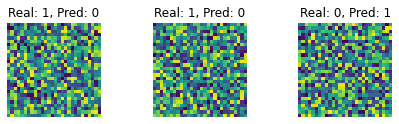

In [2]:

y_true = [1,0,2,0,0,1,1,0]
y_pred = [0,0,2,0,1,1,0,0]
x = np.random.rand(8,28*28)

eval = Evaluate(y_true,y_pred,x)
eval.get_evaluation_report()


## 2o Μέρος




### MNIST Dataset

To MNIST είναι από τα πιο διαδεδομένα σύνολα δεδομένων στη μηχανική μάθηση. Το κελί που ακολουθεί φορτώνει τα δεδομένα εκπαίδευσης σε έναν πίνακα x_train με τις ετικέτες των δεδομένων στη λίστα y_train, και τα testing δεδομένα αντίστοιχα στα x_test και y_test.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_dset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
test_dset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
## From https://colab.research.google.com/notebooks/mlcc/multi-class_classification_of_handwritten_digits.ipynb#scrollTo=JfFWWvMWDFrR
def parse_labels_and_features(dataset):
  """Extracts labels and features.
  
  This is a good place to scale or transform the features if needed.
  
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the first column and
      monochrome pixel values on the remaining columns, in row major order.
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  labels = dataset[0]

  # DataFrame.loc index ranges are inclusive at both ends.
  features = dataset.loc[:,1:784]
  # Scale the data to [0, 1] by dividing out the max value, 255.
  features = features / 255
  # Αρα περιεχει στη πρωτη στηλη τν ετικα και μετα μετα στο features ενα πινακα με 784 στηλες απο μονοχρομα πιξελ


  return labels, np.array(features)

def show_image(features):
  img = features.reshape((28,28))
  plt.imshow(img)
  plt.show()

y_train,x_train = parse_labels_and_features(train_dset)
y_test,x_test = parse_labels_and_features(test_dset)

In [ ]:
print("Shape of an image: "+str(x_train[0].shape)) #20000*784
print("Max value of pixel: "+str(np.max(x_train[0])))
# print(y_train.shape)
# x_train->20000*784
# y_train->20000
# x_test->10000*784
# y_test->10000
#Άρα για τα παραδείγματα που ακολουθούν n=20000, p=784

Shape of an image: (784,)
Max value of pixel: 1.0


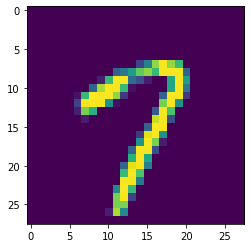

Label = 7


In [ ]:
i = np.random.randint(0,x_train.shape[0])
show_image(x_train[i])
print("Label = " +str(y_train[i]))

# 2o Μέρος: Υλοποίηση KNN

Στο μέρος αυτό της άσκησης υλοποιήσαμε τον αλγόριθμο KNN για ταξινόμηση. Για τον ταξινομητή k κοντινότερων γειτόνων κάνουμε την εξής διαδικασία:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται μια "φρέσκια" εικόνα ως διάνυσμα από pixels $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστιχεί στα pixels μιας εικόνας από τα δεδομένα εκπαίδευσης. Όπως φαίνεται παρακάτω, πειραματιστήκαμε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομήσαμε τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Επιστρέφουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Μας δόθηκε η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Συμπληρώσαμε τον κώδικα που λείπει στις μεθόδους distance, get_knn και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
## Simple KNN

class KNN: # Αρχικοποίηση συνόλου δεδομένων όπου x:εικόνες, y:ετικέτες
  def __init__(self,x,y,k,distance="euclidian"):
    self.x = x
    self.y = y
    self.k = k
    self.distance = distance
  
  
  ## Compute the distance between the two vectors img1 and img2
  # hint: use np.linalg.norm for eucledian
  # hint: use equation given above for cosine
  def get_distance(self,img1,img2):
    if self.distance=='euclidian':
      dist = np.linalg.norm(img1-img2)
    elif self.distance=='cosine':
      dist=1-np.dot(img1,img2)/(np.linalg.norm(img1)*np.linalg.norm(img2))  #frobenius norm
    return dist


  ## Given an image as a vector, returns indexes of k nearest neighbors
  def get_knn(self,img):
    distances = list()
    x = self.x
    k = self.k
    
    #for each row in x_train calculate distance with img
    for row in x:
      dist=self.get_distance(row,img)
      distances.append(dist)
    # Sort distances, and return the indexes of k first elements
    ans_indexes = np.argsort(distances)[:k]
    return ans_indexes


  ## Given an image as a vector, classify it according to KNN
  # hint: we have a list of k labels and want to return the most common one
  def classify(self,img):
    y = self.y
    nn_labels = [y[i] for i in self.get_knn(img)]
    prediction= max(set(nn_labels),key=nn_labels.count)
    return prediction


## Αξιολόγηση του KNN

- Χρήση του euclidian

Input image: 


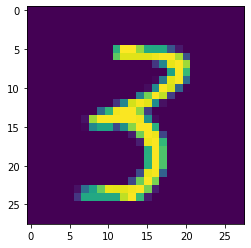

Prediction : 3


In [ ]:
knn = KNN(x_train,y_train,k=5,distance='euclidian')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))

In [ ]:
## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


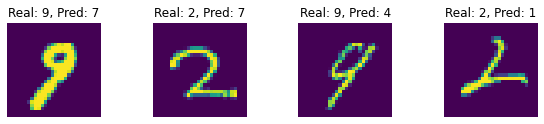

In [ ]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

Δοκιμάζουμε διάφορες τιμές του k



Input image: 


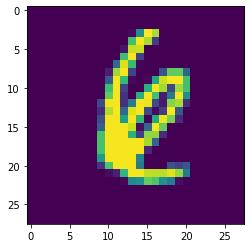

Prediction : 6
precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


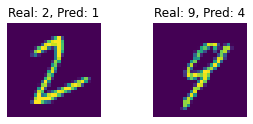

In [ ]:
#k=1
knn = KNN(x_train,y_train,k=1,distance='euclidian')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()



Input image: 


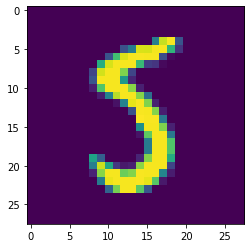

Prediction : 5
precision : 0.9570238095238096
recall : 0.939599567099567
f1 : 0.9434034081860169
accuracy : 0.94
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


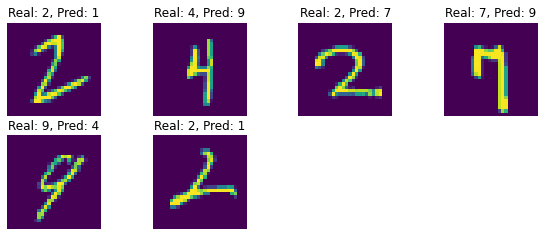

In [ ]:
#k=30
knn = KNN(x_train,y_train,k=30,distance='euclidian')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()


Input image: 


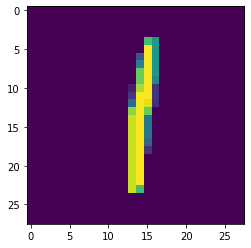

Prediction : 1
precision : 0.9582620320855615
recall : 0.9344047619047618
f1 : 0.940073248656699
accuracy : 0.94
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  1  0  0  0]
 [ 0  1  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


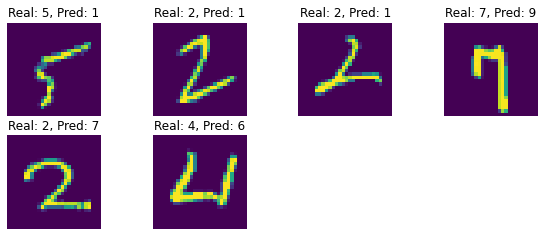

In [ ]:
#k=50
knn = KNN(x_train,y_train,k=50,distance='euclidian')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()


###Χρήση του cosine

Για k=5


Input image: 


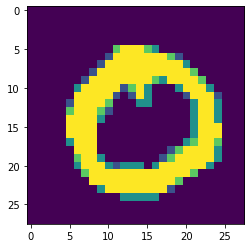

Prediction : 0


In [ ]:
knn = KNN(x_train,y_train,k=5,distance='cosine')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

precision : 0.9888888888888889
recall : 0.9928571428571429
f1 : 0.9904139433551198
accuracy : 0.99
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0 13  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


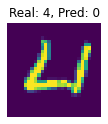

In [ ]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

Input image: 


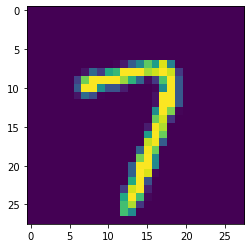

Prediction : 7
precision : 1.0
recall : 1.0
f1 : 1.0
accuracy : 1.0
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


<Figure size 720x720 with 0 Axes>

In [ ]:
#k=1
knn = KNN(x_train,y_train,k=1,distance='cosine')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

Input image: 


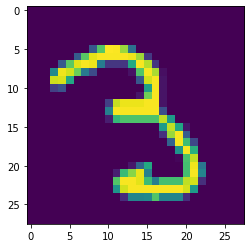

Prediction : 3
precision : 0.9735042735042736
recall : 0.9790476190476192
f1 : 0.9746437301711135
accuracy : 0.97
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


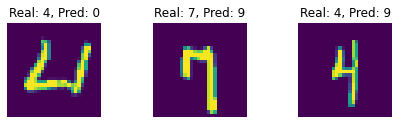

In [ ]:
#k=30
knn = KNN(x_train,y_train,k=30,distance='cosine')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

Input image: 


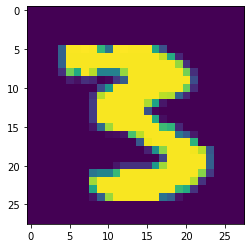

Prediction : 3
precision : 0.9612820512820512
recall : 0.9522619047619048
f1 : 0.9538578088578088
accuracy : 0.95
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  1  0  0  1]
 [ 0  0  0  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


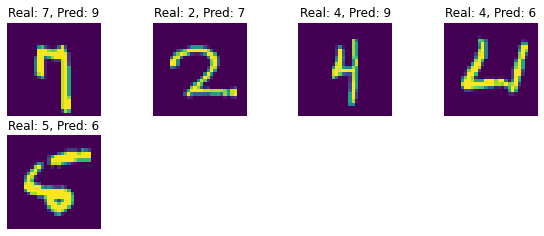

In [ ]:
#k=50
knn = KNN(x_train,y_train,k=50,distance='cosine')
img = x_test[np.random.randint(0,x_test.shape[0])]  #len(img)=784 pixels
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))


## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]


eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


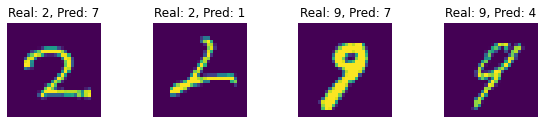

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


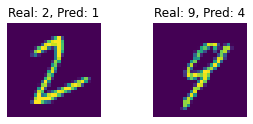

In [ ]:
k = 1
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

precision : 0.9570238095238096
recall : 0.939599567099567
f1 : 0.9434034081860169
accuracy : 0.94
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions


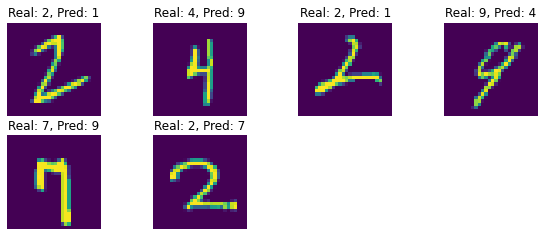

In [ ]:
k = 30
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

precision : 0.9582620320855615
recall : 0.9344047619047618
f1 : 0.940073248656699
accuracy : 0.94
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  1  0  0  0]
 [ 0  1  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


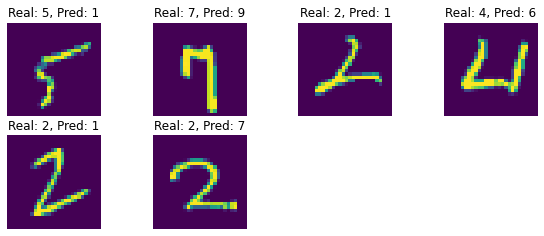

In [ ]:
k = 50
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

## Σύκγριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστήκαμε με τις δύο υλοποιήσεις (τη δική μας και την έτοιμη). Όπως φαίνεται προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και εμφανίζονται οι χρόνοι εκτέλεσης.

In [ ]:
%%time
knn = KNN(x_train,y_train,k=5,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 21.5 s, sys: 8.94 ms, total: 21.5 s
Wall time: 21.6 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=1,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 21.6 s, sys: 5 ms, total: 21.6 s
Wall time: 21.6 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=30,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 21.9 s, sys: 2.01 ms, total: 21.9 s
Wall time: 22 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=50,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 21.3 s, sys: 11 ms, total: 21.3 s
Wall time: 21.4 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=5,distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 41.4 s, sys: 11 ms, total: 41.4 s
Wall time: 41.6 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=1,distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 40.8 s, sys: 12.9 ms, total: 40.8 s
Wall time: 40.9 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=30,distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 45.8 s, sys: 16.8 ms, total: 45.8 s
Wall time: 46.3 s


In [ ]:
%%time
knn = KNN(x_train,y_train,k=50,distance='cosine')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 41.5 s, sys: 13 ms, total: 41.5 s
Wall time: 41.6 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 6.54 s, sys: 11 ms, total: 6.55 s
Wall time: 6.58 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 6.54 s, sys: 7 ms, total: 6.55 s
Wall time: 6.55 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=30)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 6.59 s, sys: 12 ms, total: 6.6 s
Wall time: 6.61 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 6.47 s, sys: 11 ms, total: 6.48 s
Wall time: 6.49 s


#### Σχολιασμός Αποτελεσμάτων

Όπως φάνηκε παραπάνω δοκιμάσαμε τόσο για την ευκλείδια απόσταση όσο και την απόσταση συνημιτόνου διάφορες τιμές του k και συγκεκριμένα τις τιμές k=1 ,5, 30 ,50 . Οι ίδιες τιμές δοκιμάστηκαν και στην περίπτωση του έτοιμου KNN classifier. Η επιλογή του k επηρεάζει σημαντικά την επίδοση του αλγορίθμου. Η ιδέα του να διαλέγουμε τα k κοντινότερα δεδομένα, αυξάνει ακόμα περισσότερο το υπολογιστικό κόστος. Απο την άλλη πλευρά, αυξάνει την ανοχή στο θόρυβο. Παρατηρούμε ότι για την ακραία περίπτωση που το k=1, τα training data θα προβλεφθούν τέλεια. Αυτό σημαίνει ότι το σφάλμα λάθους  πρόβλεψης εόναι μηδενικό. Το accuracy,precision και recall και στις 3 υλοποιήσεις (δική μας υλοποίηση με euclidean, δική μας υλοποίηση με cosine και έτοιμο KNN classifier) είναι πολύ υψηλό (~1). Παρόλα αυτά όταν εισάγονται νέα δεδομένα στο test set, υπάρχει μεγαλύτερη πιθανότητα να προκύψει λάθος. Όταν το Κ αυξανεται, δηλαδή περιέχει περισσότερους γείτονες , το training error θα αυξηθεί, αλλά το test error θα μειωθεί. Αυτό σημαίνει ότι μειώνεται και το accuracy, recall και precision. 
 
Τέλος μετρήσαμε και τους χρόνους που χρειάζεται η κάθε υλοποίηση (τόσο με τη χρήση συνιμητόνου όσο και με τη χρήση ευκλείδιας απόόστασης) αλλά και με τη χρήση της έτοιμης συνάρτησης για τις τιμές του k που αναφέρθηκαν παραπάνω. Παρατηρούμε ότι  ο έτοιμος KNN classifier για όλες τις τιμές του K είναι ο πιο σύντομος σε χρόνο αφου χρειάζεται περίπου 5.9 sec. Ακολουθεί η δική μας υλοποίηση με χρήση της ευκλείδιας αποστασης με χρόόνο γύρω 24.5 sec .Τέλος ακολουθεί η χρηση της αποστασης συνημιτόνου με χρόνο γύρω στα 45.7 sec.

#3o Μέρος 

Στο μέρος αυτό της άσκησης υλοποιήσαμε τον αλγόριθμο Naive Bayes. 

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean, δηλαδή παίρνουν δύο τιμές
  - Για το συγκεκριμένο πρόβλημα στρογγυλοποιήσαμε τις τιμές των pixels από το $[0.0,1.0]\rightarrow{\{0,1\}}$
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηρστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

#### Υλοποίηση

Αρχικά στρογγυλοποιούμε τις τιμές των pixels για να παίρνουν διακριτές τιμές στο $\{0,1\}$

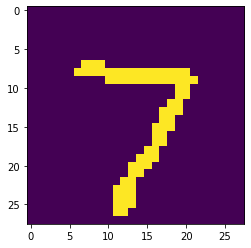

In [ ]:
## Στρογγυλοποίηση:
x_train_r = np.round(x_train)
x_test_r = np.round(x_test)
show_image(x_test_r[0])

Παρακάτω  δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Aρχικά υπολογίσαμε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια υπολογίσαμε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    ## pC is a vector with the probability of each class
    self.pC = np.zeros((10,))
    ## pxC is an array with all probabilities p(xi|C) --> (784,10)
    self.pxC = np.zeros((x.shape[-1],10)) 
    ## Compute the probabilities
    ##EXTRA
    self.pxC0= np.zeros((x.shape[-1],10)) 
    self.compute_probabilities()

  def compute_probabilities(self):
    ## Compute p(C) for each class
    for label in self.y:
      self.pC[label]+=1
    self.pC = self.pC/self.y.shape[0]

    #x-->(20000,784)

    #Split the dataset by class values
    y=self.y
    x=self.x
    separated={}
    for i in range(len(x)):
      x_i=x[i]
      class_value=y[i]
      if(class_value not in separated):
        separated[class_value]=list()
      separated[class_value].append(x_i)

    #Seperated is a dictionary that groups x_i vectors by class

    ## Compute p(xi|C) for each feature xi and class C
    # p(x_i=1/C) 
    # print(len(separated))
    for class_val,class_summaries in separated.items():
      # print(len(class_summaries), class_val)
      for check in range(784): #check for each x_i how many times in each class is 1
        counter=0
        counter0=0
        for j in class_summaries: #class_summaries is a list of lists
          # print(j[check])
          if(j[check]==1.0):
            counter+=1
          if(j[check]==0.0):
            counter0+=1
        self.pxC[check][class_val]=counter/len(class_summaries)
        self.pxC0[check][class_val]=counter0/len(class_summaries)
    # print("end")
    # for i in range(self.pxC.shape[0]):
    #   print(self.pxC[i])
    return self.pxC,self.pC
        

  #p=784

  def predict(self,x):
    ## ~Probability of x belonging to each class
    ## (not actucal probability since we ignore denominator)
    pcX = np.ones((10,))
    count=0
    for i in range(10):
      # hint: We have probabilities p({x_j=1}|i) in self.pxC
      # We also need p({x_j=0}|i) for computing p(x|i) 
      product=1
      for j in range(784):
        if(x[j]==1.0):
          product*=self.pxC[j][i]
        else:
          product*=(1-self.pxC[j][i])
      pcX[i]=self.pC[i]*product
    return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

precision : 0.8400974025974026
recall : 0.850108225108225
f1 : 0.8261529454950507
accuracy : 0.85
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  1  0]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 13  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  1  9]]
Some images with wrong predictions


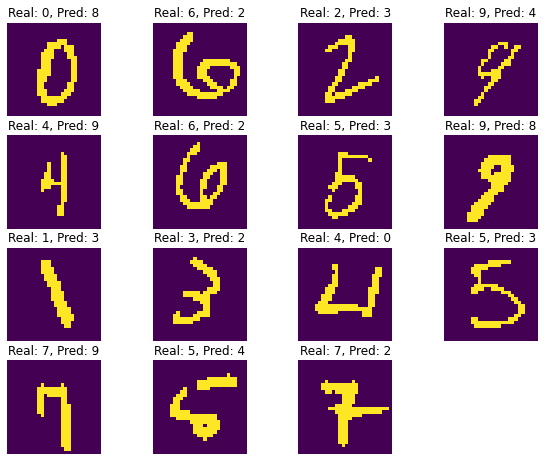

In [ ]:
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


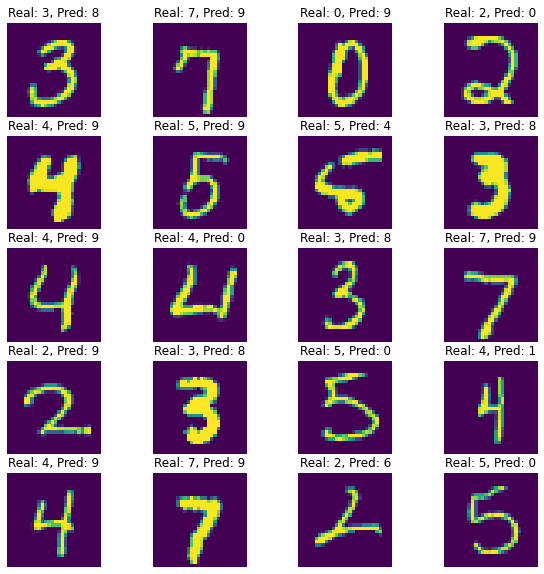

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

## Σύγκριση υλοποιήσεων

Έπειτα συγκρίνουμε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Έχουμε:


In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 8.59 s, sys: 6 ms, total: 8.6 s
Wall time: 8.62 s


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 314 ms, sys: 3.99 ms, total: 318 ms
Wall time: 320 ms


#Σχολιασμός Αποτελεσμάτων

Παραπάνω φαίνονται οι δύο υλοποίησεις του αλγορίθμου Naive-Bayes και τα αποτελέσματα που προκύπτουν απο τη μελέτη τους. Τονίζουμε ότι ο έτοιμος αλγοριθμος είναι ενας Gaussian Naive Bayes Classifier, ενώ αντίθετα ο δικός μας είναι ένας Bernulli Naive Bayes Classifier. O Gaussian Naive Bayes Classifier χρησιμοποιείται για συνεχή δεδομένα των οποίων οι τιμές ακολουθούν την Γκαουσιανή κατανομή. Αντίθετα, ενας Bernulli Naive Bayes Classifier χρησιμοποιείται όταν η τυχαία μεταβλητή Χ ακολυθεί την κατανομή Bernuli. Ο δικός μας classifier έχει μεγαλύτερο accuracy, precision και recall απο τον έτοιμο.  Επισημαίνουμε πως κάναμε αρχικά μερικές υποθέσεις που δεν ισχύουν στο πραγματικό κόσμο. Μια απο αυτές που δεν ισχύει είναι η ανεξαρτησία των χαρακτηριστικών που ωστόσο δίνει καλά αποτελέσματα στην πράξη. Επισημαίνεται ότι στην αρχή του ερωτήματος αυτού κάναμε στρογγυλοποίηση, με στόχο την διακριτοποίηση των τιμών ( 0-1 ). Έτσι για τον ταξινομητή που υλοποιήσαμε εμείς χρησιμοποίησαμε τα στρογγυλοποιημένα δεδομένα (x_train_r, y_train_r), ενω στον έτοιμο χρησιμοποιήμε τα αρχικά δεδομένα που είχαν συνεχείς τιμές (x_train, y_train) και όχι τα στρογγυλοποιημένα. Η στρογγυλοποίηση προφανώς επηρέασε σε μεγάλο βαθμό τo recall, precision και accuracy. Συγκεκριμένα, όπως αναφέραμε πριν,  στην δική μας υλοποίηση οι τιμές αυτές είναι πιο μεγάλες από ότι στην έτοιμη. Αυτό είναι απόλυτα λογικό, αφού ο ταξινομητής μας, δοθέντος ένα διανύσματος εισόδου x,  καλείται να προβλέψει αν στην θέση x[i]  έχει τιμή 0 ή 1. Αυτό έχει μεγάλη πιθανότητα να γίνει σωστά. Αντίθετα, ο έτοιμος επειδή εκπαιδεύεται με συνεχή δεδομένα και δέχεται ως είσοδο ένα διάνυσμα x με συνεχείς τιμές, έχει μικρότερη πιθανότητα να προβλέψει τη σωστή τιμή στη θέση x[i]. Για αυτό το λόγο έχει και μικρότερο accuracy, recall, precision από τον δικό μας . Οσον αφορά το χρόνο ο δικός μας classifier κάνει μεγαλύτερο χρόνο απο τον έτοιμο, όπως φαίνεται παραπάνω. 



#4ο Μέρος: Multi-Layer Perceptron 

Σε αυτό το σημείο της άσκησης επιλύουμε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά υλοποιούμε το νευρωνικό χωρίς τη χρήση κάποιας έτοιμης κλάσης κάποιας βιβλιοθήκης, ενώ στην συνέχεια κατασκευάζουμε το ίδιο σύστημα με την χρήση της βιβλιοθήκης sckit-learn. 

Στο παρακάτω κελί κώδικα  δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά- κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει την ανανέωση των βαρών του δικτύου και συνεπώς στην σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  
Η λειτουργικότητα συνεπώς κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης συνεπώς  επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα.

In [4]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  


Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  
  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  


In [5]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητοί να διατηρεί 2 τους δυο πίνακες με τα βάρη οι όποιο στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά. Συμπληρώσαμε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [6]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Weight Initialization
        """
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        # Τα βάρη αρχικά αρχικοποιούνται με τυχαίο τρόπο
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units) # Σταθερές b
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output=np.dot(input,self.weights) + self.biases
        
        ## Your code above
        ##################
        return output
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        # Εδώ υπολογίζονται τα νέα βάρη με βάση το τύπο της διαφάνειας 14
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματα του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση [softmax](https://en.wikipedia.org/wiki/Softmax_function) χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [7]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 10 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο.  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου (εδώ 28*28). Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Συμπληρώσαμε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.

In [8]:
class MLP:
    def __init__(self, shapes, input_dim):
        '''
        Κατασκευή του MLP. Τα επίπεδα και το μέγεθός τους ορίζεται από την μεταβλήτη shape, ενώ
        το μέγεθος της εισόδου ορίζεται από την μεταβλήτη input_dim
        '''
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1],shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i],shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διαφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            activations.append(l.forward(input))
            # Θέτουμε τη είσοδο (input) ως την έξοδο του προηγούμενου επιπέδου
            # Η επιθυμητή έξοδος είναι το τελευταίο στοιχείο του activations
            input = activations[-1]
    
            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
        
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Στα παρακάτω κελιά κώδικα παρουσιάζονται διαφορετικά στιγμιότυπα του παραπάνω Νευρωνικού Δικτύου εκπαιδευμένα για διαφορετικές τιμές εποχών και νευρώνων ανά επίπεδο σε κάθε διαφορετική υλοποίηση. Για τη τελευταία εποχή παρουσιάζονται τα αποτελέσματα μαζί με μια γραφική των train και test accuracy. 

First MLP with 100,200,100 Hidden Layer Neurons trained 43 epochs:
Epoch 42
Train accuracy: 0.819
Val accuracy: 0.8253


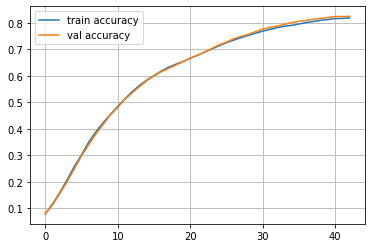

precision : 0.829366572122276
recall : 0.8217063908256457
f1 : 0.8203684739638138
accuracy : 0.8253
Confusion matrix: 
[[ 915    0   12    7    0   12   18    1   15    0]
 [   0 1085    2    4    0    0    4    1   39    0]
 [  25   26  807   35   30    0   34   16   58    1]
 [  17    4   33  819    4   28    5   24   72    4]
 [   1    7    9    0  827    1   20    5   13   99]
 [  41   13   17   90   25  528   32   23  116    7]
 [  41    8   15    2   13    6  860    0   13    0]
 [   2   30   10    2   16    5    0  917   31   15]
 [   9    8   12   56   16   18   15   19  817    4]
 [   7    6   11   13  157    9    2   96   30  678]]
Some images with wrong predictions


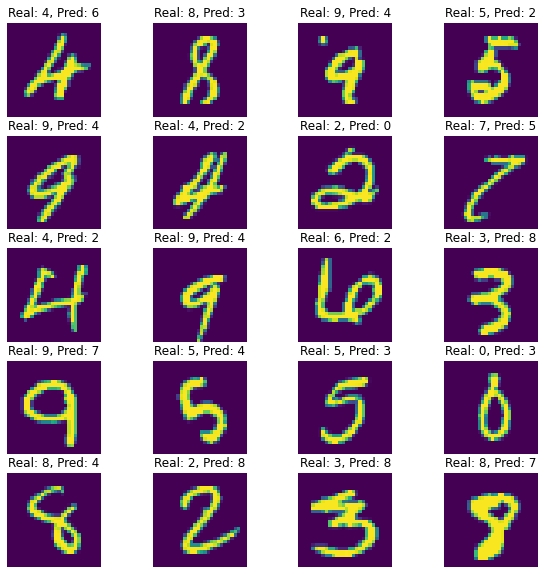

In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)
print('First MLP with 100,200,100 Hidden Layer Neurons trained 43 epochs:')
train_log = []
val_log = []

for epoch in range(43):
     network.fit(x_train,y_train)
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))
print("Epoch",epoch)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Second MLP with 200,300,300 Hidden Layer Neurons trained 38 epochs:
Epoch 37
Train accuracy: 0.83405
Val accuracy: 0.8393


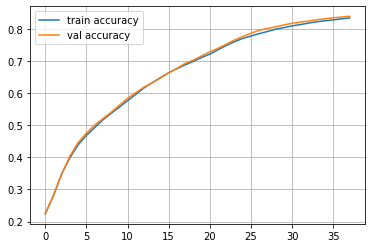

precision : 0.8363811045796199
recall : 0.8356066633356034
f1 : 0.8346535832584809
accuracy : 0.8393
Confusion matrix: 
[[ 935    0    4    2    1   18   15    1    4    0]
 [   0 1099   11    2    1    1    3    1   17    0]
 [  13   30  844   38   20    0   30   11   43    3]
 [   7    1   39  829    4   48    3   19   54    6]
 [   1    3    7    0  845    1   23    6   10   86]
 [  37   20    8  112   19  553   27   39   55   22]
 [  22    8   29    2   15   14  858    0   10    0]
 [   3   30   16    1   16    0    0  882   37   43]
 [   7   15   26   45   19   51   12   20  754   25]
 [  10    6    6    8   81   13    8   70   13  794]]
Some images with wrong predictions


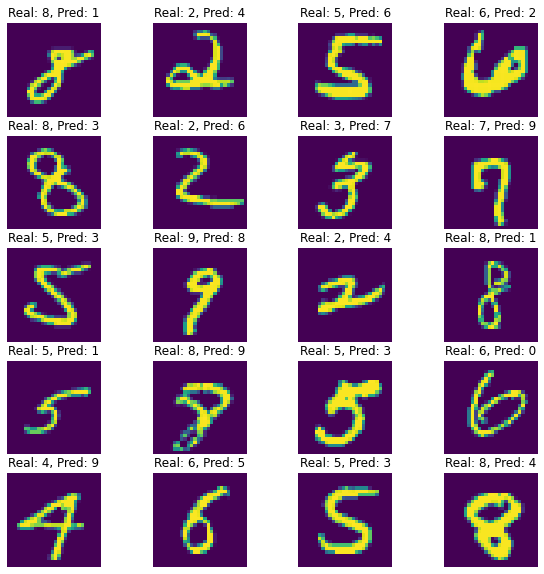

In [ ]:
from IPython.display import clear_output
import numpy as np

print('Second MLP with 200,300,300 Hidden Layer Neurons trained 38 epochs:')
network= MLP([200, 300, 300, 10], 28*28)
train_log = []
val_log = []
for epoch in range(38):
     network.fit(x_train,y_train)
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))
print("Epoch",epoch)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Third MLP with 300,400,400 Hidden Layer Neurons trained 34 epochs:
Epoch 33
Train accuracy: 0.82235
Val accuracy: 0.8284


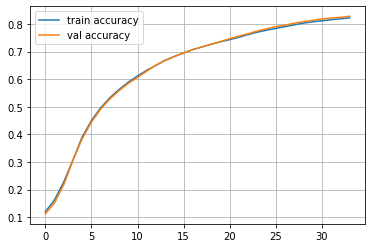

precision : 0.8288040744607896
recall : 0.824244179268803
f1 : 0.8226829258132728
accuracy : 0.8284
Confusion matrix: 
[[ 926    0    4   10    1   15   20    2    2    0]
 [   0 1078   12    4    1    0    4    1   35    0]
 [  20   36  812   30   30    0   28   13   59    4]
 [   8    6   26  861    3   34    6   23   30   13]
 [   3   13    4    0  791    0   27    5   13  126]
 [  27   17   22  137   19  489   40   35   62   44]
 [  26    7   28    1   16    7  866    0    7    0]
 [   5   52   19    1   16    2    1  883   12   37]
 [  10   14   20   47   14   27   15    9  784   34]
 [  16   12    4   16  103    5    3   45   11  794]]
Some images with wrong predictions


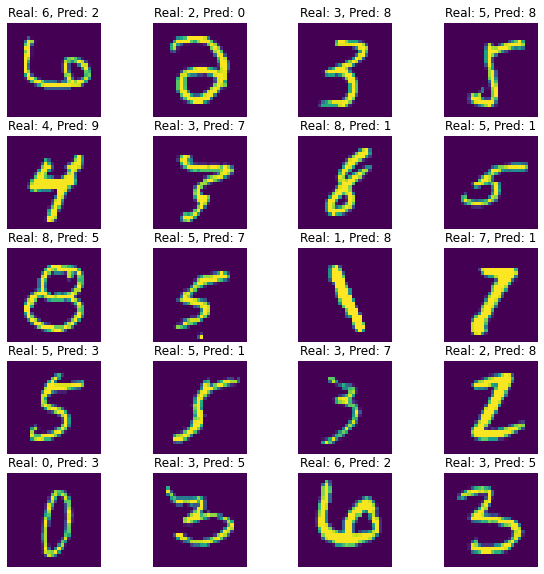

In [ ]:
from IPython.display import clear_output
import numpy as np

print('Third MLP with 300,400,400 Hidden Layer Neurons trained 34 epochs:')
network= MLP([300, 400, 400, 10], 28*28)
train_log = []
val_log = []
for epoch in range(34):
     network.fit(x_train,y_train)
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))
print("Epoch",epoch)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

Fourth MLP with 100,200,200,100 Hidden Layer Neurons trained 30 epochs:
Epoch 29
Train accuracy: 0.66095
Val accuracy: 0.6615


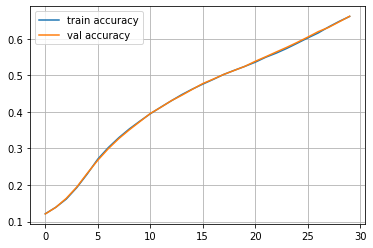

precision : 0.6952374806731427
recall : 0.6510381228554246
f1 : 0.6105325891686143
accuracy : 0.6615
Confusion matrix: 
[[ 919    0   15   16    2    0   17    4    3    4]
 [   0 1106    1    2    4    0    5    1   16    0]
 [  47   71  471   44    3    0  327   17   49    3]
 [  52   20   17  823    3    0   22   36   31    6]
 [   9   19   31    2  392    0  146    4   10  369]
 [ 152   61   13  341   39   10   65   48  147   16]
 [  21   20   15    1    6    0  891    0    4    0]
 [  13   31   15   17   16    0   10  833   43   50]
 [  55   66   26  219   12    1   61   46  466   22]
 [  38   20   35   41   59    0   13   80   19  704]]
Some images with wrong predictions


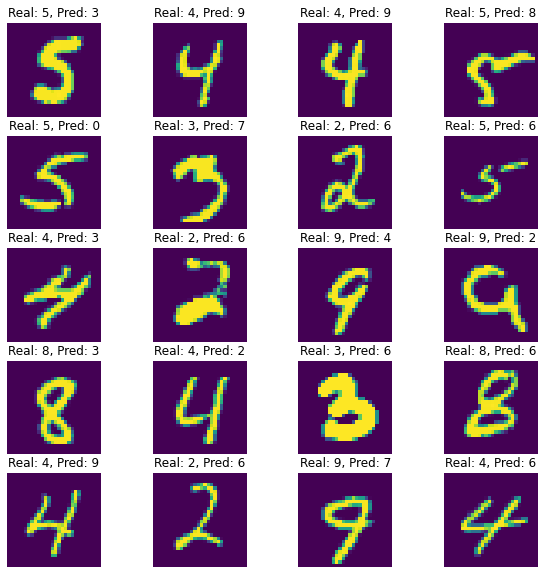

In [9]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200,200,100, 10], 28*28)
print('Fourth MLP with 100,200,200,100 Hidden Layer Neurons trained 30 epochs:')
train_log = []
val_log = []

for epoch in range(30):
     network.fit(x_train,y_train)
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))
print("Epoch",epoch)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Κατασκευάζουμε το ίδιο MLP χρησιμοποιώντας την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.968466686356976
recall : 0.9684390773384163
f1 : 0.9684330917561519
accuracy : 0.9687
Confusion matrix: 
[[ 965    1    0    1    0    3    5    1    2    2]
 [   0 1123    4    1    0    0    3    1    3    0]
 [   2    5 1002    5    5    0    2    7    4    0]
 [   3    1   11  965    0    9    0    8   11    2]
 [   3    0    2    0  954    1    3    2    1   16]
 [   5    0    0    4    2  866    9    2    3    1]
 [   7    3    2    1    7    7  927    1    3    0]
 [   2    5   11    3    0    1    0  991    3   12]
 [   6    1    5   10    7    7    4    8  921    5]
 [   4    3    0    6    8    2    1    3    9  973]]
Some images with wrong predictions
CPU times: user 42.7 s, sys: 15.7 s, total: 58.4 s
Wall time: 29.9 s


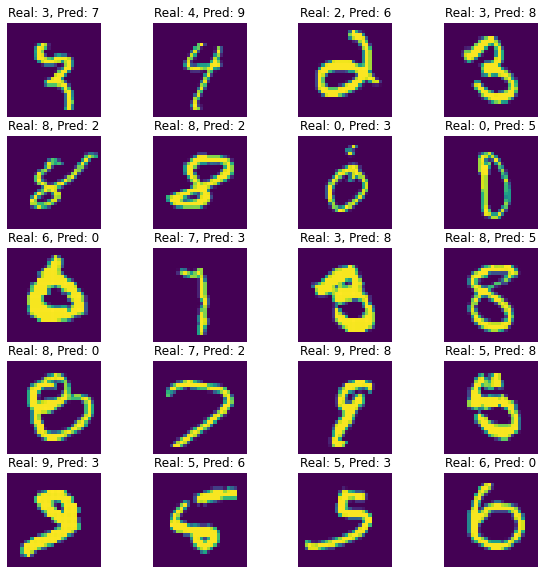

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

# Σύγκριση Χρόνων Εκτέλεσης

In [12]:
%%time
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)
train_log = []
val_log = []
for epoch in range(25):
     network.fit(x_train,y_train)
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))

CPU times: user 58.8 s, sys: 9.53 s, total: 1min 8s
Wall time: 34.7 s


In [11]:
%%time
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)

CPU times: user 45.7 s, sys: 17.6 s, total: 1min 3s
Wall time: 32.3 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Σύγκριση Υλοποιήσεων - Συμπεράσματα

**Αριθμός Νευρώνων**

Από τα παραπάνω στιγμιότυπα νευρωνικών δικτύων παρατηρούμε ότι όσο αυξάνονται οι νευρώνες σε κάθε επίπεδο του Νευρωνικού Δικτύου τόσο λιγότερες εποχές χρειάζεται το δίκτυο ώστε να συκγλίνει στη μέγιστη δυνατή απόδοση που επιτυγχάνει για τη συγκεκριμένη τιμή του βήματος εκπαίδευσης.

**Αριθμός Επιπέδων**

Στη περίπτωση προσθήκης ενός ακόμη επιπέδου παρατηρούμε γρηγορότερη σύγκλιση σε καλύτερη απόδοση η οποία ωστόσο είναι μικρότερη από τις προηγούμενες περιπτώσεις συνεπώς θεωρούμε ότι η δομή των 3 επιπέδων είναι η καλύτερη από αυτές που δοκιμάστηκαν.

**Βήμα Εκπαίδευσης**

Από δοκιμές που έγιναν για διαφορετικές τιμές του βήματος εκπαίδευσης και οι οποίες δε παρατίθενται στην εργασία για συντομία συμπεραίνεται ότι η τελική μέγιστη απόδοση που μπορεί να επιτευχθεί στο Νευρωνικό Δίκτυο ανεξαρτήτως αριθμού εποχών καθορίζεται από το βήμα εκπαίδευσης με μέγιστη τιμή που παρατηρήθηκε να είναι f1=0.9 για περίπου 90 εποχές εκπαίδευσης με βήμα εκπαίδευσης 0.075.

Προφανώς ένα Νευρωνικό Δίκτυο με μεγαλύτερο βήμα εκπαίδευσης συγκλίνει πιο γρήγορα σε ικανοποιητικές αποδόσεις αλλά με μικρότερη μέγιστη τιμή σε σχέση με ένα δίκτυο με μικρότερο βήμα εκπαίδευσης που συκγλίνει πιο αργά αλλά σε μεγαλύτερη μέγιστη απόδοση.

**Έτοιμο Νευρωνικό**

Όσον αφορά την έτοιμη υλοποίηση παρατηρούμε ότι επιτυγχάνει πολύ ικανοποιητική απόδοση f1=0.95-0.97 και καλύτερη από τη δική μας υλοποίηση f1=0.80-0.85 για ίδιες τιμές νευρώνων ανά επίπεδο και εποχών. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α.

**Χρόνοι Εκτέλεσης**

Οι χρόνοι εκτέλεσης είναι παρόμοιοι για ίδιες παραμέτρους.
 

# Συνολική Αξιολόγηση- Συμπεράσματα 

**Χρόνοι Εκτέλεσης**

Παρατηρούμε ότι οι χρόνοι εκτέλεσης είναι καλύτεροι για τον αλγόριθμο Naive Bayes. Αυτό ισχύει τόσο για τη δική μας υλοποίηση όσο και για την έτοιμη. Ακολουθεί ο αλγόριθμος KNN και τέλος το MLP. Οι διαφορές στους χρόνους εκτελέσης οφείλονται προφανώς στις εγγενείς δομικές διαφορές των αλγορίθμων και πιθανές βελτιστοποιήσεις που έχουν χρησιμοποιηθεί.

**Αποτελέσματα**

Όσον αφορά την απόδοση παρατηρείται καλύτερη απόδοση για το έτοιμο MLP, παρόμοια για το έτοιμο αλγόριθμο ΚΝΝ και τέλος για τον αλγόριθμο Naive Bayes. Όσον αφορά τις δικές μας υλοποιήσεις καλύτερη υλοποίηση προκύπτει του αλγορίθμου ΚΝΝ, στη συνέχεια του MLP για μεγάλο αριθμό εποχών με μικρό βήμα εκπαίδευσης και τέλος του Naive Bayes. Ωστόσο σημειώνεται πως αν είχαν γίνει κατάλληλες βελτιστοποιήσεις στον MLP μας πιθανό να είχε παρόμοια απόδοση με τον αλγόριθμο ΚΝΝ.

Συνεπώς συμπεραίνουμε ότι για το συγκεκριμένο πρόβλημα ταξινόμησης είναι προτιμότερο να χρησιμοποιηθεί ο αλγόριθμος KNN ή το MLP.

